In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,index,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,Result
0,1,1,-1,-1,-1,0,1,1,1,1,-1
1,2,-1,-1,1,1,0,1,1,1,1,-1
2,3,-1,-1,-1,-1,0,1,1,1,1,-1
3,4,0,-1,1,1,0,1,1,1,1,-1
4,5,0,-1,1,1,0,-1,1,-1,1,1


In [4]:
df.columns

Index(['index', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'Result'],
      dtype='object')

In [5]:
df.shape

(11055, 11)

In [6]:
df.isnull().sum()

index                  0
Links_in_tags          0
SFH                    0
Submitting_to_email    0
Abnormal_URL           0
Redirect               0
on_mouseover           0
RightClick             0
popUpWidnow            0
Iframe                 0
Result                 0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split,cross_val_score

In [8]:
X= df.drop(columns='Result')
X.head()

,index,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe
0,1,1,-1,-1,-1,0,1,1,1,1
1,2,-1,-1,1,1,0,1,1,1,1
2,3,-1,-1,-1,-1,0,1,1,1,1
3,4,0,-1,1,1,0,1,1,1,1
4,5,0,-1,1,1,0,-1,1,-1,1


In [9]:
Y=df['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,-1
1,-1
2,-1
3,-1
4,1


In [10]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=2)

In [11]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
logreg_predict= model_1.predict(test_X)

In [14]:
accuracy_score(logreg_predict,test_Y)

0.6571687019448214

In [15]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.46      0.67      0.55       687
           1       0.81      0.65      0.72      1524

    accuracy                           0.66      2211
   macro avg       0.64      0.66      0.64      2211
weighted avg       0.70      0.66      0.67      2211



In [16]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

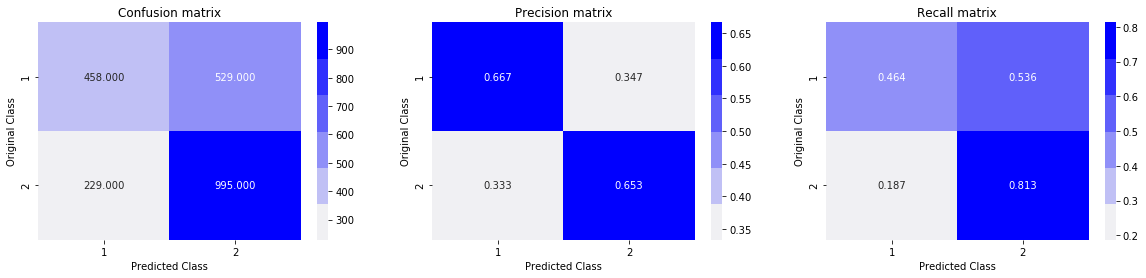

In [17]:
plot_confusion_matrix(test_Y, logreg_predict)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [20]:
dtree_predict=model_3.predict(test_X)

In [21]:
accuracy_score(dtree_predict,test_Y)

0.6173677069199457

In [22]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.57      0.57      0.57       993
           1       0.65      0.66      0.65      1218

    accuracy                           0.62      2211
   macro avg       0.61      0.61      0.61      2211
weighted avg       0.62      0.62      0.62      2211



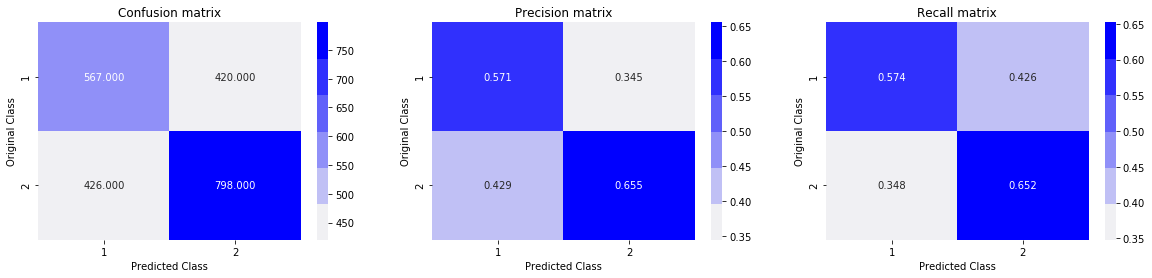

In [23]:
plot_confusion_matrix(test_Y, dtree_predict)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [26]:
rfc_predict=model_4.predict(test_X)


In [27]:
accuracy_score(rfc_predict,test_Y)

0.613749434644957

In [28]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.57      0.57      0.57      1001
           1       0.65      0.65      0.65      1210

    accuracy                           0.61      2211
   macro avg       0.61      0.61      0.61      2211
weighted avg       0.61      0.61      0.61      2211



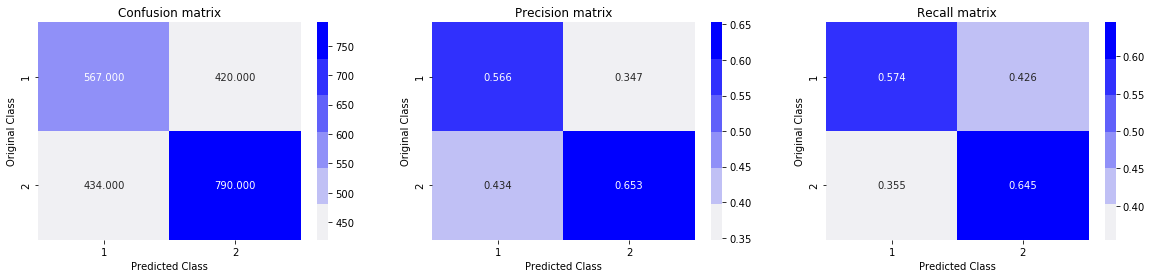

In [29]:
plot_confusion_matrix(test_Y, rfc_predict)

In [30]:
from sklearn.svm import SVC

In [31]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
svm_predict=model_5.predict(test_X)

In [33]:
accuracy_score(svm_predict,test_Y)

0.55359565807327

In [34]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.55      0.71      2211

    accuracy                           0.55      2211
   macro avg       0.50      0.28      0.36      2211
weighted avg       1.00      0.55      0.71      2211



c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


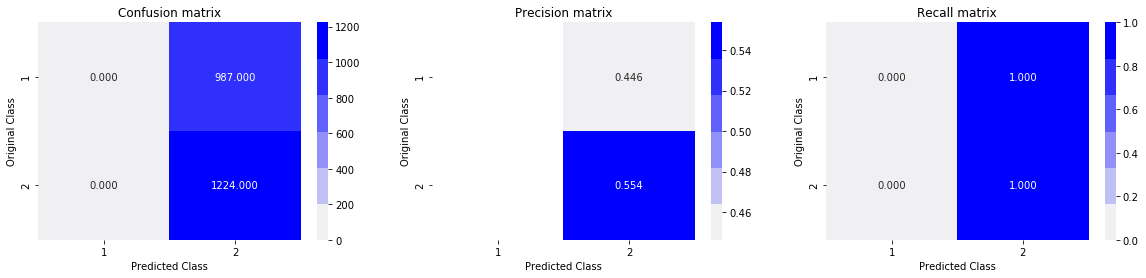

In [35]:
plot_confusion_matrix(test_Y, svm_predict)

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [38]:
adc_predict=model_6.predict(test_X)

In [39]:
accuracy_score(adc_predict,test_Y)

0.6494798733604704

In [40]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.45      0.66      0.53       676
           1       0.81      0.65      0.72      1535

    accuracy                           0.65      2211
   macro avg       0.63      0.65      0.63      2211
weighted avg       0.70      0.65      0.66      2211



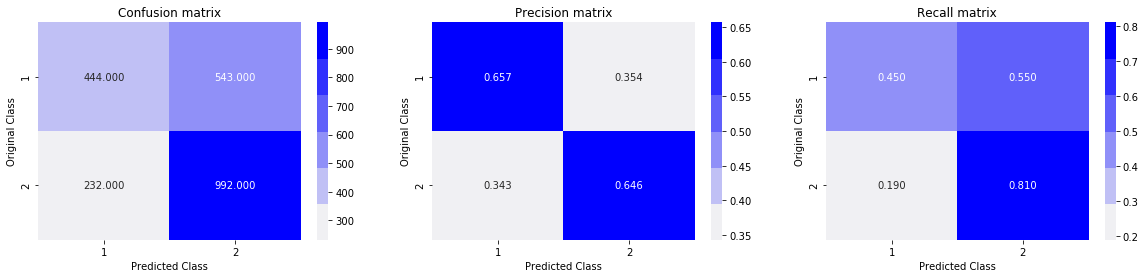

In [41]:
plot_confusion_matrix(test_Y, adc_predict)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [45]:
knn_predict=model_2.predict(test_X)

In [46]:
accuracy_score(knn_predict,test_Y)

0.5336951605608322

In [47]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.48      0.47      0.47       987
           1       0.58      0.58      0.58      1224

    accuracy                           0.53      2211
   macro avg       0.53      0.53      0.53      2211
weighted avg       0.53      0.53      0.53      2211



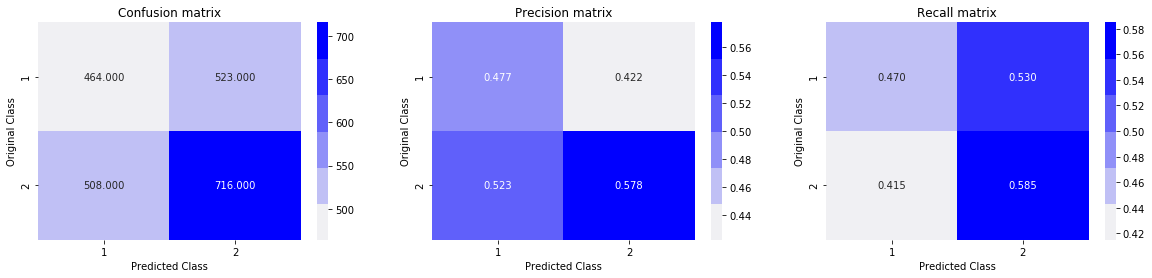

In [48]:
plot_confusion_matrix(test_Y, knn_predict)


In [49]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))

Logistic Regression Accuracy: 0.6571687019448214
K-Nearest Neighbour Accuracy: 0.5336951605608322
Decision Tree Classifier Accuracy: 0.6173677069199457
Random Forest Classifier Accuracy: 0.613749434644957
support Vector Machine Accuracy: 0.55359565807327
Adaboost Classifier Accuracy: 0.6494798733604704
